# model_GS_LGBM

#### Grid_Search
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter  
https://www.codexa.net/hyperparameter-tuning-python/

In [1]:
# !jupyter nbconvert --to python model_GS_LGBM.ipynb

In [1]:
# warningの無視
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lightgbm as lgb

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

%matplotlib inline

In [33]:
def importances(model):
    """ 変数重要度
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.barh(range(len(indices)), importances[indices] , align='center')
    plt.yticks(range(len(indices)), feature_X[indices])
    plt.title('decision tree feature importance')
    plt.xlabel('feature importance')
    plt.ylabel('variable')
    plt.show()

#### ========================

In [34]:
path = "../data/models/"
modelName= "model_GS_LGBM"

#### ========================

In [20]:
train_y=pd.read_pickle('../data/feature/pre_feature_data_y.pickle')
train_X=pd.read_pickle('../data/feature/pre_feature_data_X.pickle')

In [5]:
train_X=pd.read_pickle('../data/feature/train_X.pickle')
valid_X=pd.read_pickle('../data/feature/valid_X.pickle')
# test_X=pd.read_pickle('../data/feature/test_X.pickle')

train_y=pd.read_pickle('../data/feature/train_y.pickle')
valid_y=pd.read_pickle('../data/feature/valid_y.pickle')
# test_y=pd.read_pickle('../data/feature/test_y.pickle')

In [6]:
train_X.shape

(204381, 2334)

In [97]:
# test_X.shape

In [98]:
# model=lgb.LGBMClassifier(random_state=1)

In [99]:
# model.fit(train_X,train_y)

LGBMClassifier(random_state=1)

In [100]:
# pred=model.predict(valid_X)

In [101]:
# print(f1_score(valid_y, pred))

0.8794481893713749


In [21]:
seed=10
model=lgb.LGBMClassifier(random_state=seed)

In [120]:
# model.fit(train_X,train_y)
# pred=model.predict(valid_X)
# print(f1_score(valid_y, pred))

0.879849222553793


In [113]:
# # Stage 0のモデルたち
# estimators =[
#     ('model1',lgb.LGBMClassifier(max_depth=400,n_estimators=3000,num_leaves=800,random_state=1)),
#     ('model2',lgb.LGBMClassifier(max_depth=400,n_estimators=3000,num_leaves=800,random_state=628)),
#     ('model3',lgb.LGBMClassifier(max_depth=400,n_estimators=3000,num_leaves=800,random_state=11)),
#     ('model4',lgb.LGBMClassifier(max_depth=400,n_estimators=3000,num_leaves=800,random_state=6)),
#     ('model6',lgb.LGBMClassifier(max_depth=400,n_estimators=3000,num_leaves=800,random_state=10))]

In [114]:
# # Voting Classifier
# model=VotingClassifier(estimators=estimators,voting="soft")

In [115]:
# model.fit(train_X,train_y)

KeyboardInterrupt: 

In [ ]:
# # final result 
# pred = model.predict(valid_X)

In [ ]:
# print(f1_score(valid_y, pred))

In [122]:
# # モデルの保存
# with open(path + modelName + '_voting.pickle', mode='wb') as f:
#     pickle.dump(model, f)

#### ========================

In [35]:
"""ハイパーパラメータの max_depth(木の深さ), 
# n_estimators(決定木の数)に関してグリッドサーチを行う
# グリッドサーチに使用するパラメータの値を用意
"""
seed=10
params = {
    'max_depth': [100],
    'n_estimators': [3000],
    'num_leaves': [800]}

In [36]:
grid = GridSearchCV(estimator=model,
    param_grid=params,
    n_jobs=1,
    cv=KFold(6,shuffle=True, random_state=seed),
    scoring='f1',
    verbose=3,
    return_train_score=True)

In [37]:
grid.fit(train_X,  train_y)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END max_depth=100, n_estimators=3000, num_leaves=800; total time= 8.1min


KeyboardInterrupt: 

In [27]:
print(grid.best_estimator_)

LGBMClassifier(max_depth=200, n_estimators=3000, num_leaves=800,
               random_state=10)


In [30]:
# 最適解でモデルを作成
model = grid.best_estimator_

In [31]:
# モデルの保存
with open(path + modelName + '2.pickle', mode='wb') as f:
    pickle.dump(model, f)

In [32]:
pred=model.predict(valid_X)
print(f1_score(valid_y, pred))

1.0


In [138]:
pred_proba=model.predict_proba(valid_X)
# 所属確率の保存
with open(path + modelName + '_pred_proba.pickle', mode='wb') as f:
    pickle.dump(pred_proba, f)

#### ========================

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

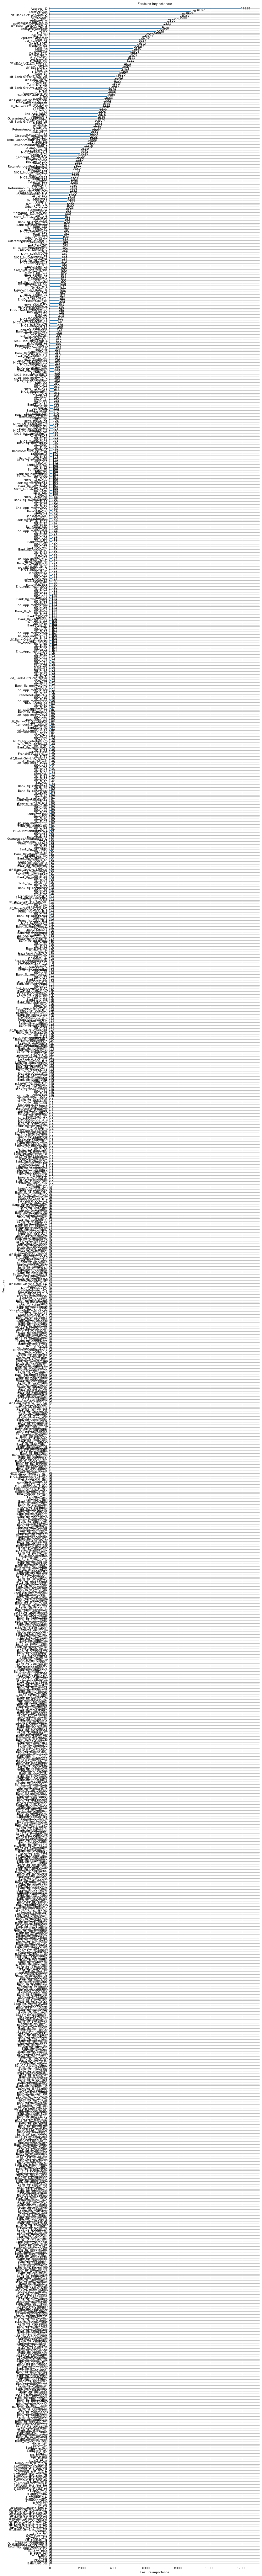

In [139]:
lgb.plot_importance(model,figsize=(12,150),ignore_zero=False)

# ========================